In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

## CH12 Q02

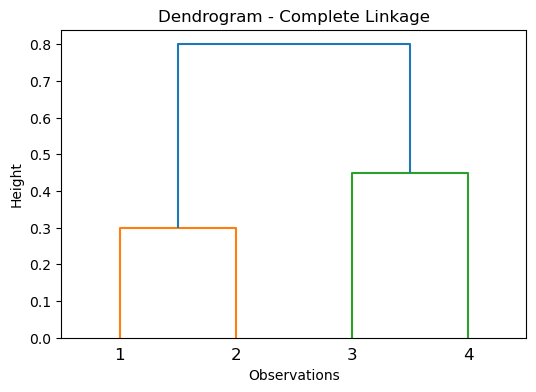

In [3]:
#(a)
# Dissimilarity matrix
dissimilarity_matrix = [
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
]
dissimilarity_matrix = sch.distance.squareform(dissimilarity_matrix)
# Perform hierarchical clustering using the dissimilarity matrix with complete linkage
Z = linkage(dissimilarity_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z, labels=['1', '2', '3', '4'])
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Observations')
plt.ylabel('Height')
plt.show()

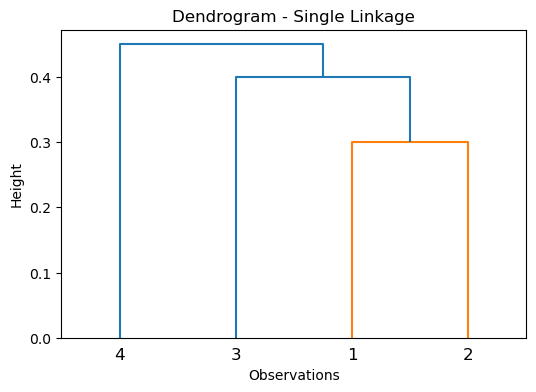

In [4]:
#(b)
# Perform hierarchical clustering using the dissimilarity matrix with single linkage
Z_single = linkage(dissimilarity_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(6, 4))
dendrogram(Z_single, labels=['1', '2', '3', '4'])
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Observations')
plt.ylabel('Height')
plt.show()

In [5]:
clusters =fcluster(Z, t=2, criterion='maxclust')
# Print the clusters
print("Clusters formed:")
for cluster_id in np.unique(clusters):
    print(f"Cluster {cluster_id}: {[f'Obs {i+1}' for i in range(len(clusters)) if clusters[i] == cluster_id]}")

Clusters formed:
Cluster 1: ['Obs 1', 'Obs 2']
Cluster 2: ['Obs 3', 'Obs 4']


#### #(c)
#### Cluster 1: Observations 1 and 2
#### Cluster 2: Observations 3 and 4

In [7]:
# Perform hierarchical clustering using single linkage
Z_single = linkage(dissimilarity_matrix, method='single')

# Cut the dendrogram such that two clusters result
clusters =fcluster(Z_single, t=2, criterion='maxclust')

# Print the cluster labels for each observation
print("Clusters formed:")
for cluster_id in np.unique(clusters):
    print(f"Cluster {cluster_id}: {[f'Obs {i+1}' for i in range(len(clusters)) if clusters[i] == cluster_id]}")

Clusters formed:
Cluster 1: ['Obs 1', 'Obs 2', 'Obs 3']
Cluster 2: ['Obs 4']


#### #(d)
#### Cluster 1: Observations 1, 2, and 3
#### Cluster 2: Observation 4

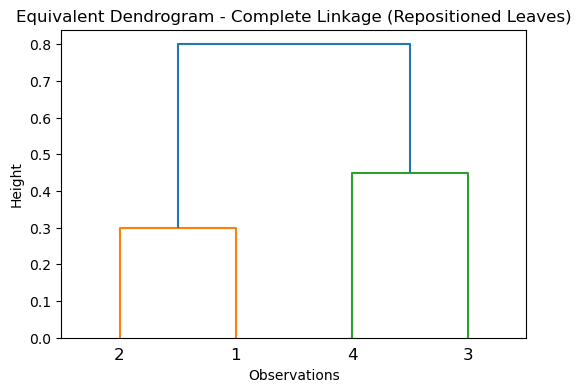

In [9]:
#(e)
Z_2 = linkage(dissimilarity_matrix, method='complete')

# Plot the equivalent dendrogram with repositioned leaves
plt.figure(figsize=(6, 4))
dendrogram(Z_2, labels=['2', '1', '4', '3'])  # Reposition the labels for an equivalent view
plt.title('Equivalent Dendrogram - Complete Linkage (Repositioned Leaves)')
plt.xlabel('Observations')
plt.ylabel('Height')
plt.show()

## CH12 Q03

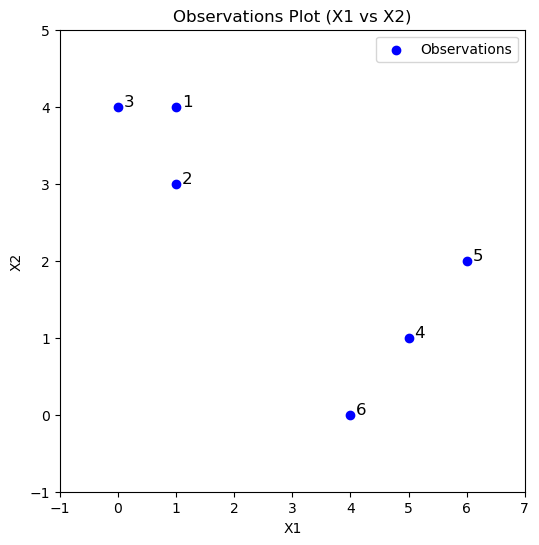

In [32]:
# Data points (X1, X2)
observations = {
    1: [1, 4],
    2: [1, 3],
    3: [0, 4],
    4: [5, 1],
    5: [6, 2],
    6: [4, 0]
}

# Separate X1 and X2 for plotting
X1 = [obs[0] for obs in observations.values()]
X2 = [obs[1] for obs in observations.values()]

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(X1, X2, color='blue', marker='o', label='Observations')

# Label each observation on the plot
for i, (x1, x2) in observations.items():
    plt.text(x1 + 0.1, x2, str(i), fontsize=12)

plt.title('Observations Plot (X1 vs X2)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(-1, 7)
plt.ylim(-1, 5)

# Show the plot
plt.legend()
plt.show()

In [12]:
# Randomly assign cluster labels (either 1 or 2) to each observation
cluster_labels = np.random.choice([1, 2], size=len(observations))

# Report the cluster labels for each observation
cluster_assignments = {i: cluster_labels[idx] for idx, i in enumerate(observations.keys())}
print(cluster_assignments)

{1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1}


In [13]:
observations_list = np.array(list(observations.values()))
# Separate the clusters
cluster_1_points = observations_list[cluster_labels == 1]
cluster_2_points = observations_list[cluster_labels == 2]

# Compute centroids for each cluster
centroid_1 = cluster_1_points.mean(axis=0)
centroid_2 = cluster_2_points.mean(axis=0)

print(f"Centroid for Cluster 1: {centroid_1}")
print(f"Centroid for Cluster 2: {centroid_2}")

Centroid for Cluster 1: [3.4 2. ]
Centroid for Cluster 2: [0. 4.]


In [14]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
new_cluster_labels = []

for obs in observations_list:
    distance_to_centroid_1 = euclidean_distance(obs, centroid_1)
    distance_to_centroid_2 = euclidean_distance(obs, centroid_2)
    
    # Assign to the cluster of the nearest centroid
    if distance_to_centroid_1 < distance_to_centroid_2:
        new_cluster_labels.append(1)
    else:
        new_cluster_labels.append(2)

# Report the new cluster assignments
new_cluster_assignments = {i: new_cluster_labels[idx] for idx, i in enumerate(observations.keys())}
print(new_cluster_assignments)

{1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1}


In [15]:
def compute_centroids(data, labels, k=2):
    centroids = []
    for i in range(1, k+1):
        cluster_points = data[labels == i]
        centroid = cluster_points.mean(axis=0) if len(cluster_points) > 0 else np.zeros(data.shape[1])
        centroids.append(centroid)
    return np.array(centroids)
def assign_clusters(data, centroids):
    new_labels = []
    for obs in data:
        distances = [euclidean_distance(obs, centroid) for centroid in centroids]
        new_labels.append(np.argmin(distances) + 1)
    return np.array(new_labels)  
max_iterations = 100
for iteration in range(max_iterations):
    # Step 1: Compute centroids based on current labels
    centroids = compute_centroids(observations_list, cluster_labels)
    
    # Step 2: Assign clusters based on nearest centroid
    new_cluster_labels = assign_clusters(observations_list, centroids)
    
    # Check if the cluster assignments have changed
    if np.array_equal(cluster_labels, new_cluster_labels):
        break  # Exit loop if no changes
    
    final_cluster_labels = new_cluster_labels  # Update labels for the next iteration

# Final cluster assignments and centroids
final_centroids = compute_centroids(observations_list, cluster_labels)
final_cluster_assignments = {i: final_cluster_labels[idx] for idx, i in enumerate(observations.keys())}

print(f"Final Cluster Assignments: {final_cluster_assignments}")
print(f"Final Centroids: {final_centroids}")

Final Cluster Assignments: {1: 2, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1}
Final Centroids: [[3.4 2. ]
 [0.  4. ]]


In [16]:
print(final_cluster_labels )

[2 2 2 1 1 1]


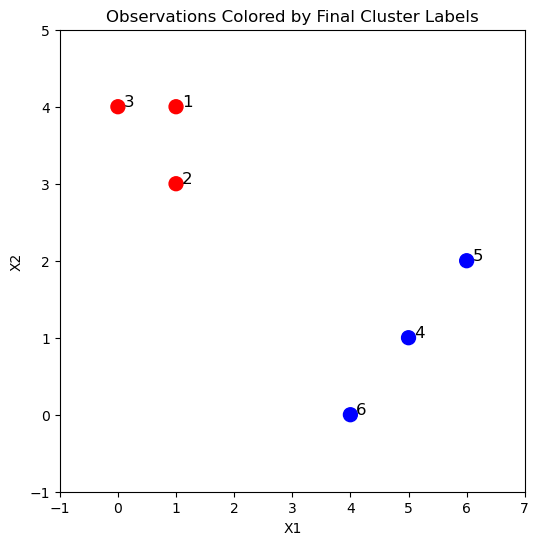

In [17]:
X1 = [obs[0] for obs in observations.values()]
X2 = [obs[1] for obs in observations.values()]

# Color map based on final cluster labels (cluster 1 -> blue, cluster 2 -> red)
colors = ['blue' if label == 1 else 'red' for label in final_cluster_labels]

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(X1, X2, c=colors, s=100)

# Label each observation on the plot
for i, (x1, x2) in observations.items():
    plt.text(x1 + 0.1, x2, str(i), fontsize=12)

plt.title('Observations Colored by Final Cluster Labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-1, 7)
plt.ylim(-1, 5)

# Show the plot
plt.show()